#Loading adata and preprocessing 

In [1]:
!wget https://technionmail-my.sharepoint.com/:u:/g/personal/ploznik_campus_technion_ac_il/EQc79uRBeO1FqtH6ILFDx78BuuWui3DuRaBtnzTB6Aqxqg?download=1 -O data.tar

--2023-05-10 13:30:26--  https://technionmail-my.sharepoint.com/:u:/g/personal/ploznik_campus_technion_ac_il/EQc79uRBeO1FqtH6ILFDx78BuuWui3DuRaBtnzTB6Aqxqg?download=1
Resolving technionmail-my.sharepoint.com (technionmail-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to technionmail-my.sharepoint.com (technionmail-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/ploznik_campus_technion_ac_il/Documents/HW1_data/data.tar?ga=1 [following]
--2023-05-10 13:30:27--  https://technionmail-my.sharepoint.com/personal/ploznik_campus_technion_ac_il/Documents/HW1_data/data.tar?ga=1
Reusing existing connection to technionmail-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 212420608 (203M) [application/x-tar]
Saving to: ‘data.tar’

data.tar            100%[===================>] 202.58M  39.1MB/s    in 8.0s    

2023-05-10 13:30:36 (25.2 MB/s) - ‘data.tar’ saved [2

In [2]:
!tar -xvf data.tar

Streaming output truncated to the last 5000 lines.
data/train/patient_5499.psv
data/train/patient_55.psv
data/train/patient_550.psv
data/train/patient_5500.psv
data/train/patient_5501.psv
data/train/patient_5502.psv
data/train/patient_5503.psv
data/train/patient_5504.psv
data/train/patient_5505.psv
data/train/patient_5506.psv
data/train/patient_5507.psv
data/train/patient_5508.psv
data/train/patient_5509.psv
data/train/patient_551.psv
data/train/patient_5510.psv
data/train/patient_5511.psv
data/train/patient_5512.psv
data/train/patient_5513.psv
data/train/patient_5514.psv
data/train/patient_5515.psv
data/train/patient_5516.psv
data/train/patient_5517.psv
data/train/patient_5518.psv
data/train/patient_5519.psv
data/train/patient_552.psv
data/train/patient_5520.psv
data/train/patient_5521.psv
data/train/patient_5522.psv
data/train/patient_5523.psv
data/train/patient_5524.psv
data/train/patient_5525.psv
data/train/patient_5526.psv
data/train/patient_5527.psv
data/train/patient_5528.psv
da

##number of train patients

In [ ]:
import os

directory = 'data/train'  # replace with the path to your directory
file_count = 0

for filename in os.listdir(directory):
    if os.path.isfile(os.path.join(directory, filename)):
        file_count += 1

print(f'There are {file_count} files in {directory}.')

There are 20000 files in data/train.


## get features range and plot histograms 

In [ ]:
import os
import pandas as pd

# Define the directory containing the psv files
directory = 'data/train'
df = pd.read_csv('data/train/patient_0.psv', sep='|')
# Initialize an empty dictionary to keep track of the value ranges for each column
column_ranges = {}
count = 0.0
total_sum = 0.0
nan_cols = {col: 0.0 for col in df.columns}
count_cols = 0.0

rel_cols = ["HR", "MAP", "Resp", "SBP", "Age", "Gender", "Lactate", "SaO2", "FiO2", "Bilirubin_total", "Bilirubin_direct", "Platelets", "Creatinine", "WBC", "Temp"]
rel_cols = ["Gender", "Age"]
first = True
# Iterate through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.psv'):
        # Load the file into a DataFrame
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, sep='|')
        #replace nan to zero
        df.iloc[:, 1].max(numeric_only = True)
        
        # Calculate the summary statistics of each column in the current file
        stats = df.describe()
        
        # Update the column_ranges dictionary to include the current file's statistics
        for col in df.columns:
            if col not in column_ranges:
                # If this is the first file, initialize the column_ranges dictionary with the current column's statistics
                column_ranges[col] = [stats.loc['min', col], stats.loc['max', col]]
            else:
                # Otherwise, update the existing range for the current column to include the current file's range
                column_ranges[col][0] = min(column_ranges[col][0], stats.loc['min', col])
                column_ranges[col][1] = max(column_ranges[col][1], stats.loc['max', col])

        # avg hours to discover
        count += 1
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, sep='|')
        labels = df['SepsisLabel'].tolist()
        if 1.0 in labels:
          total_sum = total_sum + len(labels) - df['SepsisLabel'].sum()

        # nan values
        df = pd.read_csv(file_path, sep='|')
        nan_counts = df.isna().sum().to_dict()
        count_cols += df.shape[0]
        for col, value in nan_counts.items():
            nan_cols[col] += value

        #big df
        df = pd.read_csv(file_path, sep='|')
        if first:
          big_df = df
          first = False
        else:
          big_df = pd.concat([big_df, df])

# Print the value range of each column
for col, (min_val, max_val) in column_ranges.items():
    print(f'Column {col}: [{min_val}, {max_val}]')

print()

print(f"The average hours to discover the sepsis is {total_sum/count}")
print()

for col, value in nan_cols.items():
    nan_cols[col] = value/count_cols
print(f"The precent of nan values in each column is {nan_cols}")
print()

print(f"The shape of the union data frame : {big_df.shape}")

In [ ]:
import os
import pandas as pd

# Define the directory containing the psv files
directory = 'data/train'
df = pd.read_csv('data/train/patient_0.psv', sep='|')
for col in df.columns:
            if df[col].dtype != 'object':
                df[col] = pd.to_numeric(df[col], errors='coerce')
                col_mean = df[col].mean()
                df[col] = df[col].fillna(col_mean)
stats = df.describe()

# Update the column_ranges dictionary to include the current file's statistics
for col in df.columns:
    if col not in column_ranges:
        # If this is the first file, initialize the column_ranges dictionary with the current column's statistics
        column_ranges[col] = [stats.loc['min', col], stats.loc['max', col]]
    else:
        # Otherwise, update the existing range for the current column to include the current file's range
        column_ranges[col][0] = min(column_ranges[col][0], stats.loc['min', col])
        column_ranges[col][1] = max(column_ranges[col][1], stats.loc['max', col])
column_ranges

{'HR': [20.0, 280.0],
 'O2Sat': [20.0, 100.0],
 'Temp': [20.9, 50.0],
 'SBP': [20.0, 299.0],
 'MAP': [20.0, 300.0],
 'DBP': [20.0, 300.0],
 'Resp': [1.0, 100.0],
 'EtCO2': [nan, nan],
 'BaseExcess': [-32.0, 49.5],
 'HCO3': [0.0, 55.0],
 'FiO2': [-50.0, 4000.0],
 'pH': [6.62, 7.78],
 'PaCO2': [10.0, 100.0],
 'SaO2': [23.0, 100.0],
 'AST': [nan, nan],
 'BUN': [1.0, 268.0],
 'Alkalinephos': [nan, nan],
 'Calcium': [nan, nan],
 'Chloride': [74.0, 145.0],
 'Creatinine': [0.1, 41.9],
 'Bilirubin_direct': [nan, nan],
 'Glucose': [10.0, 952.0],
 'Lactate': [0.2, 31.0],
 'Magnesium': [0.6, 9.8],
 'Phosphate': [nan, nan],
 'Potassium': [1.3, 27.5],
 'Bilirubin_total': [nan, nan],
 'TroponinI': [nan, nan],
 'Hct': [8.8, 71.7],
 'Hgb': [2.6, 25.0],
 'PTT': [17.1, 250.0],
 'WBC': [0.1, 440.0],
 'Fibrinogen': [35.0, 1760.0],
 'Platelets': [2.0, 2322.0],
 'Age': [15.0, 100.0],
 'Gender': [0.0, 1.0],
 'Unit1': [0.0, 1.0],
 'Unit2': [0.0, 1.0],
 'HospAdmTime': [-5366.86, 17.34],
 'ICULOS': [1.0, 336.0]

In [ ]:
nan_prec = pd.DataFrame([nan_cols], columns=nan_cols.keys()).T

##The percentage of nan values in each feature


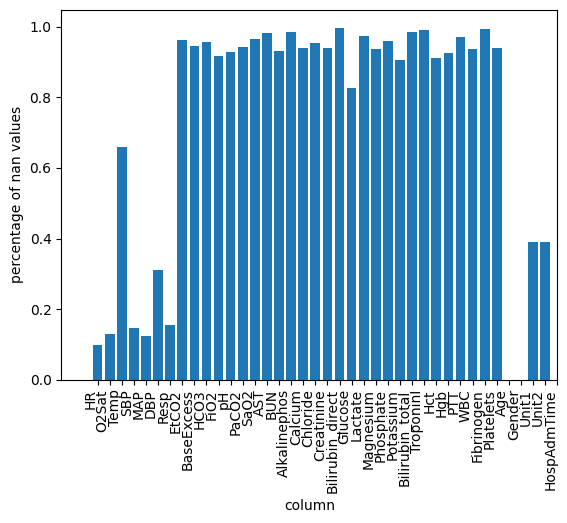

In [ ]:
import matplotlib.pyplot as plt
plt.bar(nan_cols.keys(), nan_cols.values())
plt.ylabel('percentage of nan values')
plt.xlabel('column')
plt.xticks(range(len(nan_cols)), nan_cols.keys(), rotation=90, ha='right')
plt.xlim(-3, len(nan_cols)-3)
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
def plot_nan_freq(df):
    nan_counts = df.isnull().sum().sort_values(ascending=False)
    nan_perc = nan_counts / len(df) * 100
    print(nan_perc)
    # Define color palette
    colors = sns.color_palette("rocket", len(nan_counts))
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.bar(nan_counts.index, nan_perc.values, color=colors)
    ax.set_xticks(range(len(nan_counts)))
    ax.set_xticklabels(nan_counts.index, rotation=90, ha='center', fontsize=10)
    ax.tick_params(axis='x', which='major', pad=15)
    ax.set_ylabel('Percentage of NaN values', fontweight = "bold")
    ax.set_xlabel('Data columns', fontweight = "bold")
    ax.set_title('Missing data Frequency per Column', fontweight = "bold")
    y_ticks = np.arange(0, 101, 10)
    ax.set_yticks(y_ticks)
    plt.grid(False)

    # Add text labels to highest and lowest non-zero bars
    non_zero_perc = nan_perc[nan_perc > 0]
    if len(non_zero_perc) > 0:
        max_idx = non_zero_perc.idxmax()
        min_idx = non_zero_perc.idxmin()
        ax.text(max_idx, non_zero_perc[max_idx]+1, f'{non_zero_perc[max_idx]:.1f}%', ha='center', va='bottom', fontweight='bold')
        ax.text(min_idx, non_zero_perc[min_idx]+3, f'{non_zero_perc[min_idx]:.1f}%', ha='center', va='bottom', fontweight='bold')

    plt.show()

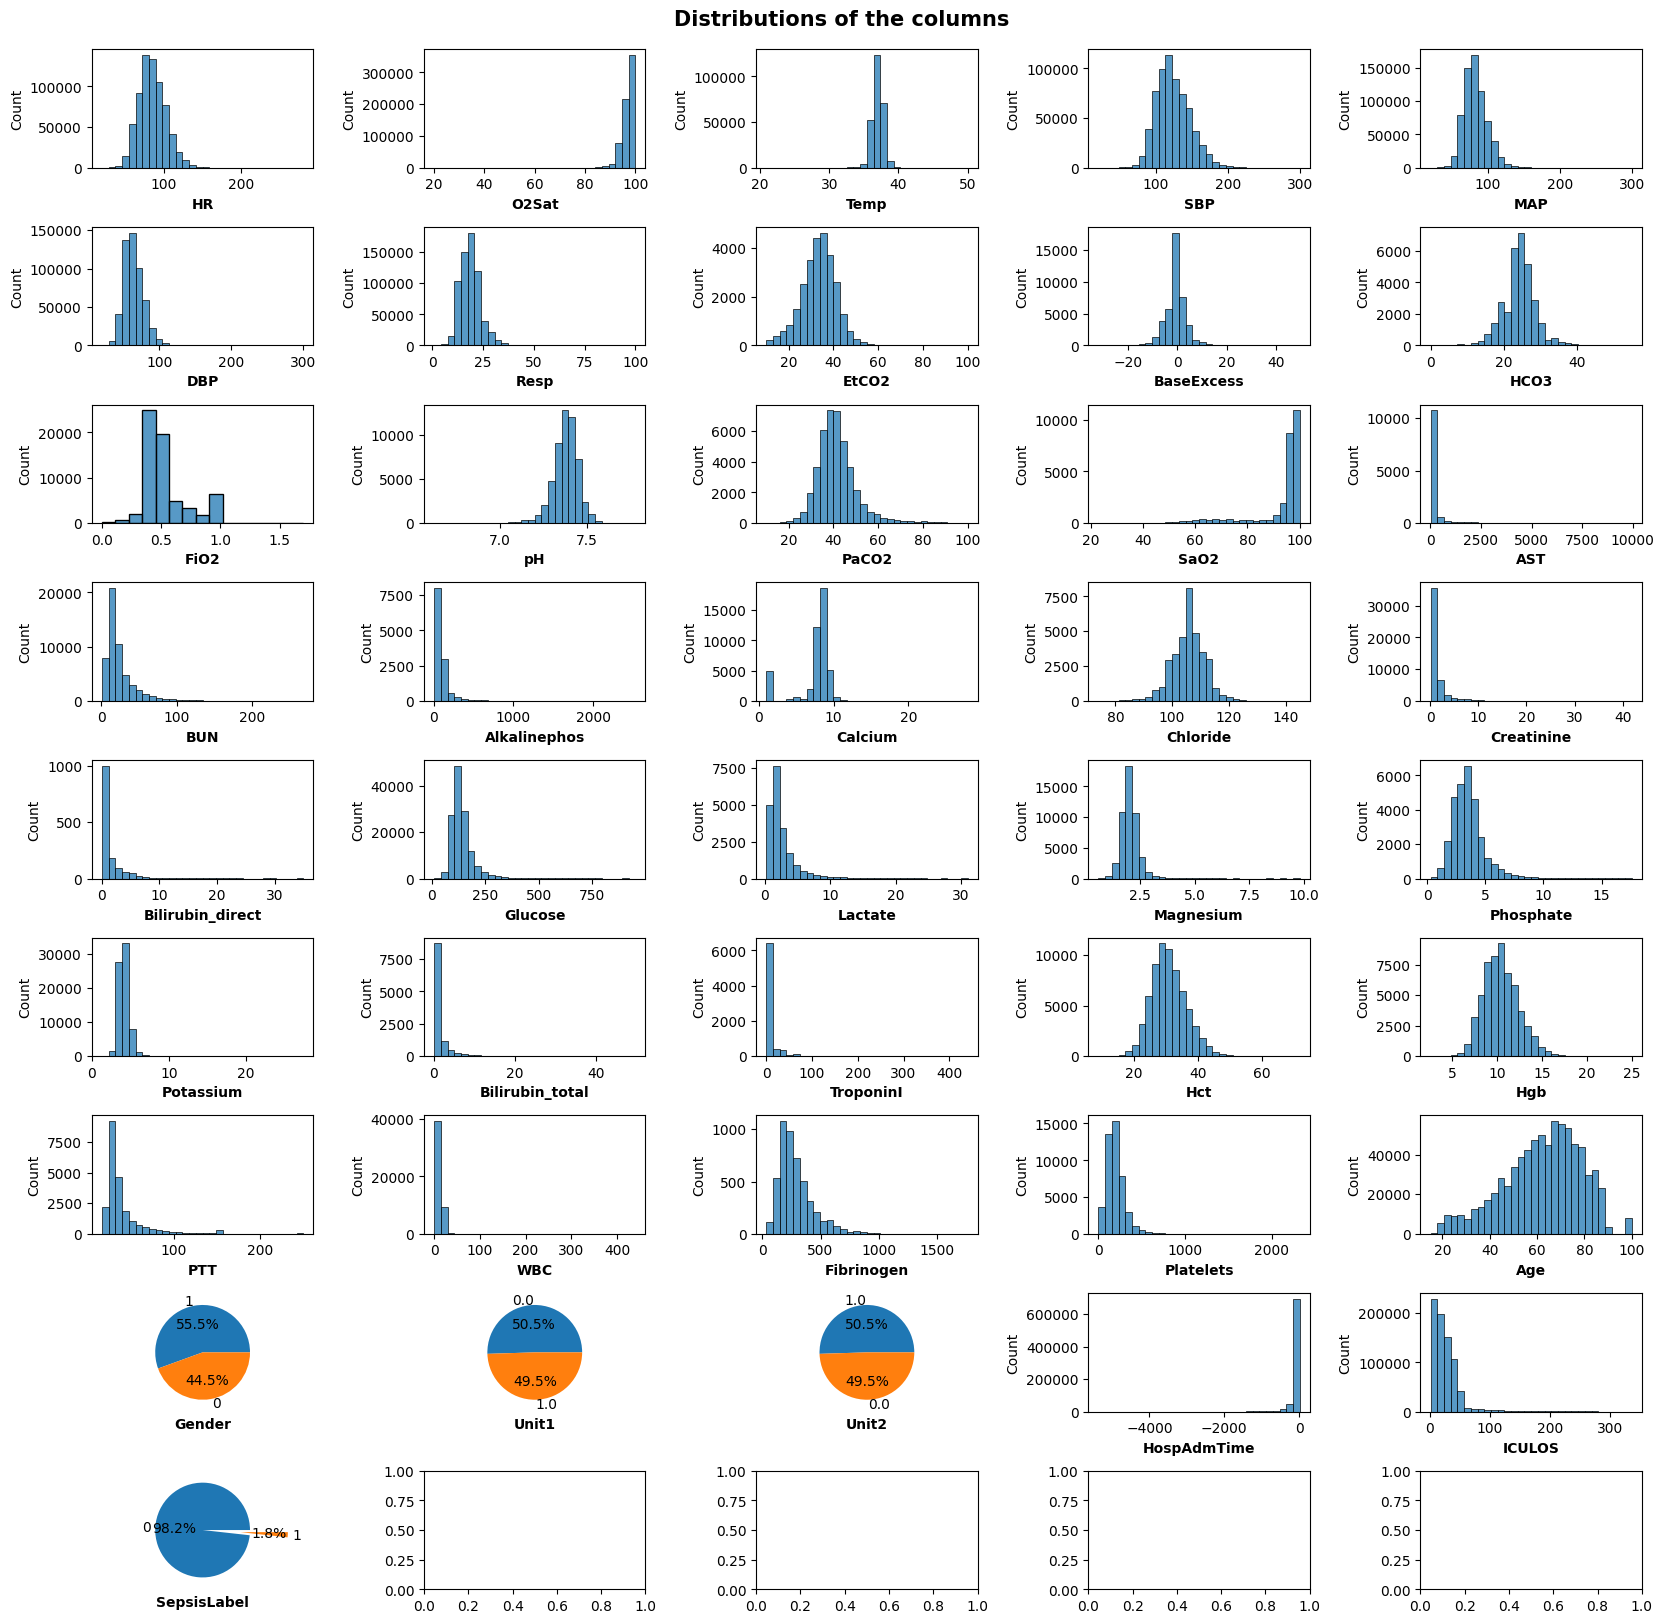

In [ ]:
columns = big_df.columns.tolist()

fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(20, 20))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle("Distributions of the columns", fontsize=15, fontweight="bold", y=0.9)

i = 0
for col in big_df.columns:
    if col != "Age" or col != "Gender":
        if big_df[col].nunique() == 2:
            counts = big_df[col].value_counts()
            if counts[1]/(counts[0]+counts[1]) > 0.95 or counts[1]/(counts[0]+counts[1]) < 0.05:
                axes[i//5, i%5].pie(counts, labels=counts.index, autopct='%1.1f%%', explode=(0, 0.8))
            else:
                axes[i//5, i%5].pie(counts, labels=counts.index, autopct='%1.1f%%')
        else:
            if col == "FiO2":
                curr_df = big_df[~big_df[col].isin([4000, -50, 7, 2])]
                sns.histplot(curr_df[col], ax=axes[i//5, i%5], bins=15)
            else:
                sns.histplot(big_df[col], ax=axes[i//5, i%5], bins=30)
                
        axes[i//5, i%5].set_xlabel(col, fontweight="bold")
        axes[i//5, i%5].grid(False)
        i += 1

plt.show()

##split dataa into sepsis patients and patients without sepsis

In [ ]:
directory = 'data/train'
ages = []
genders = []
labels = []
iculos = []
hosps = []
sick_df = pd.DataFrame()
no_sick_df = pd.DataFrame()
for filename in os.listdir(directory):
    if filename.endswith('.psv'):
        # Load the file into a DataFrame
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, sep='|')
        ages.append(df['Age'][0])
        genders.append(df['Gender'][0])
        labels.append(int(df['SepsisLabel'].sum() > 0))
        iculos.append(df.shape[0])
        hosps.append(df['HospAdmTime'][0])
        if df['SepsisLabel'].sum()>0:
          sick_df = pd.concat([sick_df, df])
        else:
          no_sick_df = pd.concat([no_sick_df, df])

## plot histograms for medically important features for sepsis detection

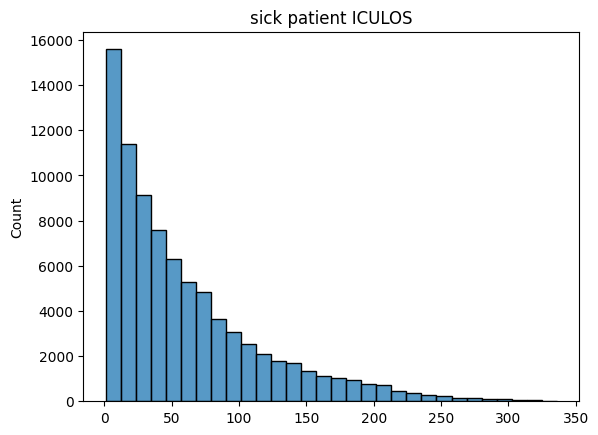

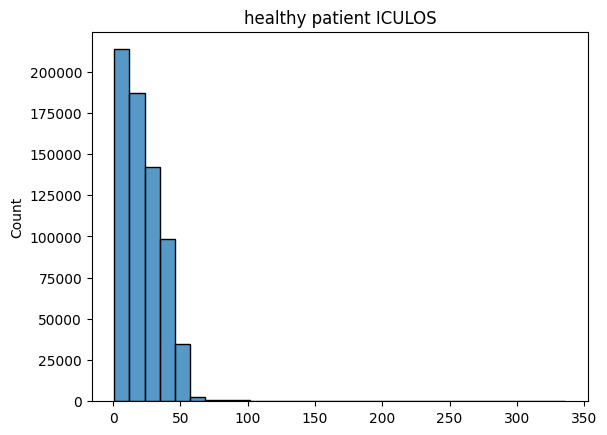

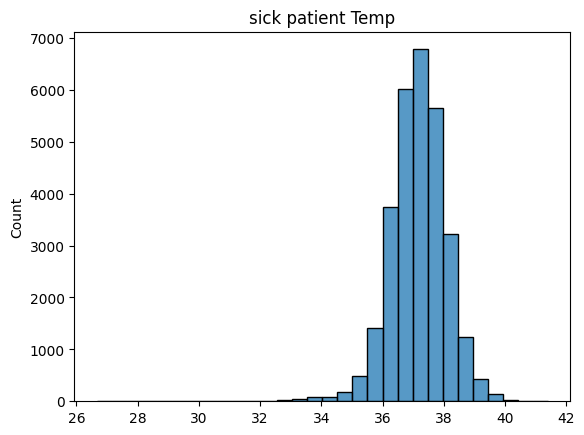

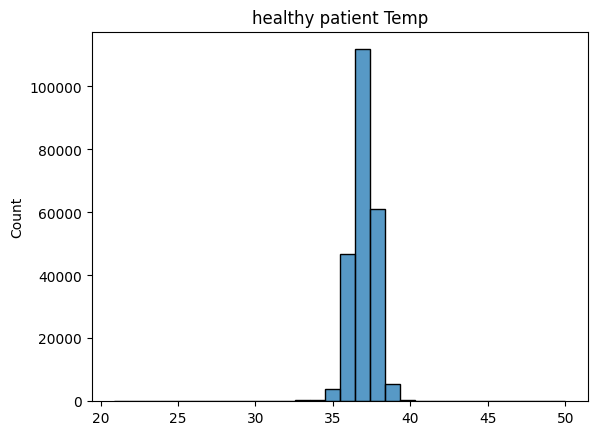

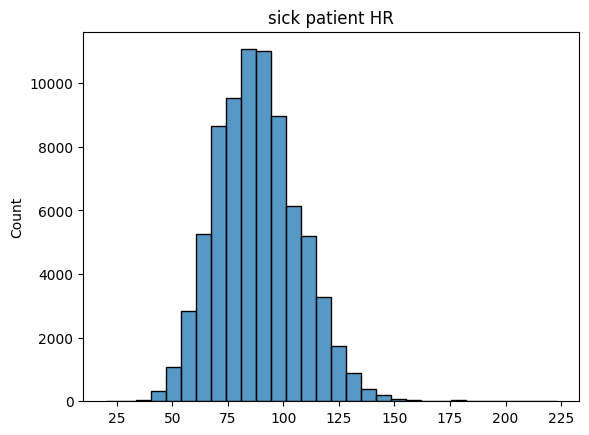

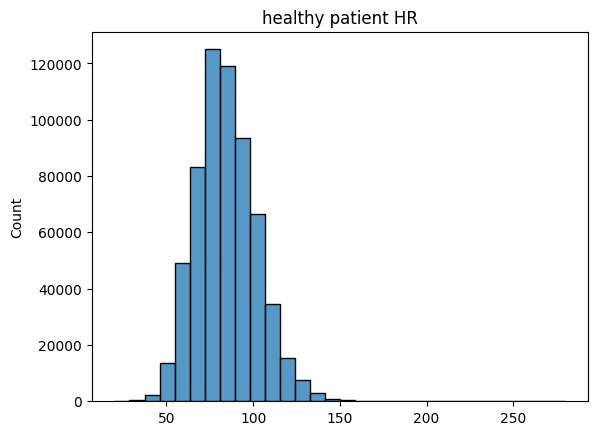

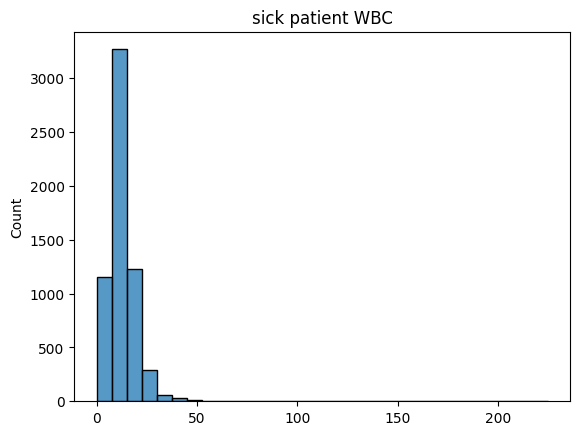

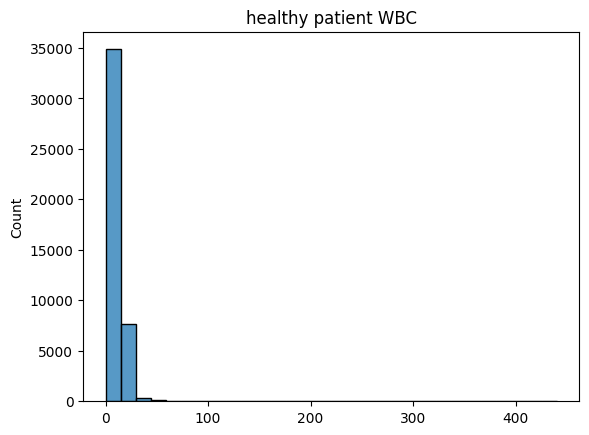

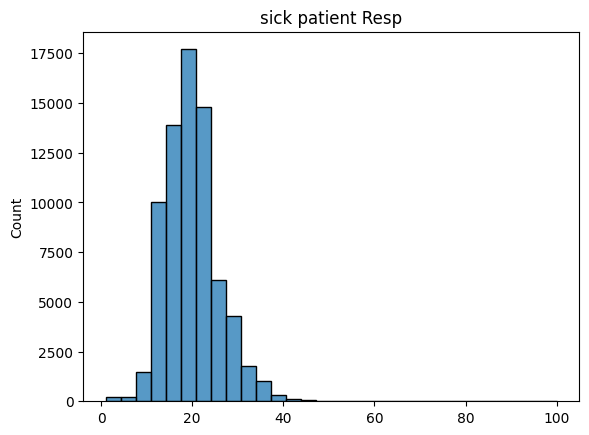

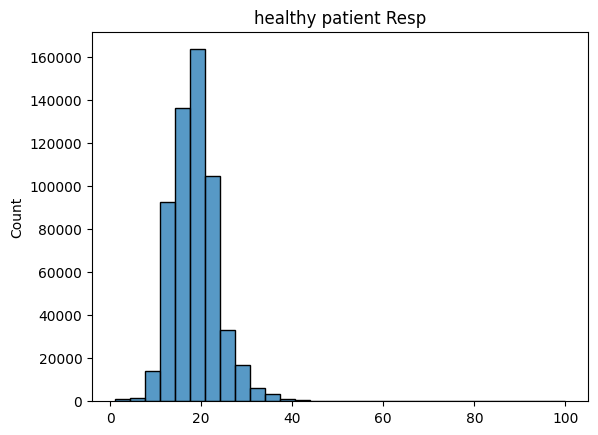

In [ ]:
cols = ['ICULOS', 'Temp', 'HR', 'WBC', 'Resp']
mean_sd = {}
for col in cols:
  sns.histplot(sick_df[col].tolist(), bins=30)
  plt.title("sick patient "+col)
  plt.show()
  mean_sd[col] = [sick_df[col].mean(), sick_df[col].std(), no_sick_df[col].mean(), no_sick_df[col].std()]
  sns.histplot(no_sick_df[col].tolist(), bins=30)
  plt.title("healthy patient "+col)
  plt.show()

In [ ]:
mean_sd['value'] = ['sick mean', 'sick sd', 'healthy mean', 'healthy sd']
mean_sd_df = pd.DataFrame(mean_sd)
mean_sd_df.set_index('value')

,ICULOS,Temp,HR,WBC,Resp
value,,,,,
sick mean,60.095187,37.139844,88.398086,12.912542,19.909332
sick sd,56.909826,0.907249,18.722675,9.600269,5.855446
healthy mean,22.513677,36.956169,84.197185,11.247779,18.607007
healthy sd,18.284782,0.756490,17.166226,7.115355,4.991442


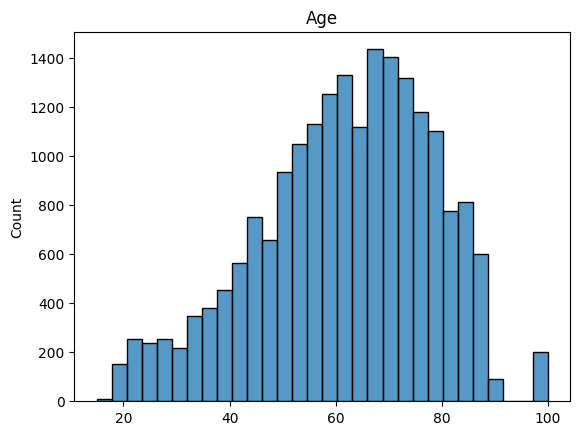

In [ ]:
sns.histplot(ages, bins=30)
plt.title('Age')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from collections import Counter

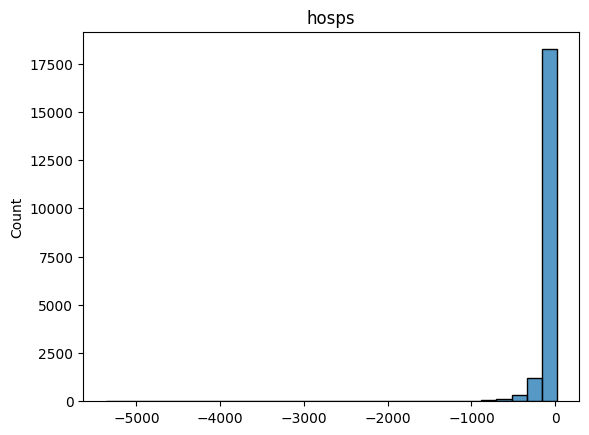

In [ ]:
sns.histplot(hosps, bins=30)
plt.title('hosps')
plt.show()

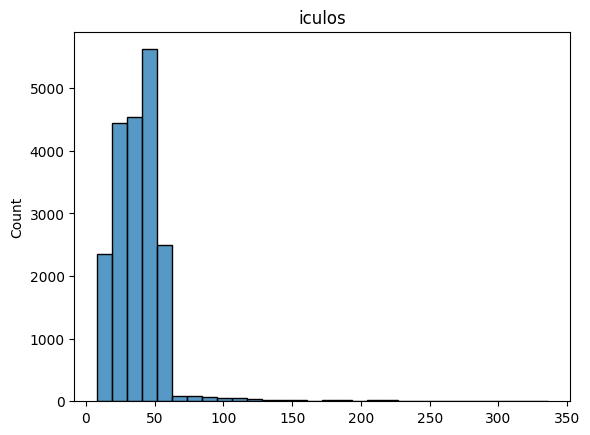

In [ ]:
sns.histplot(iculos, bins=30)
plt.title('iculos')
plt.show()

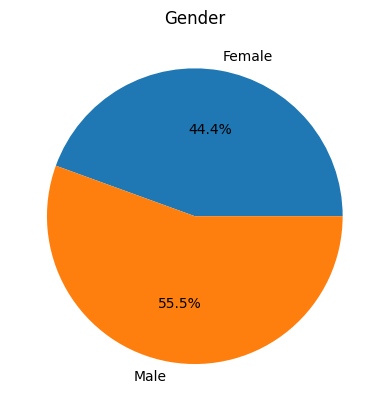

In [ ]:
from collections import Counter

plt.pie(Counter(genders).values(), labels=['Female','Male'], autopct='%1.1f%%')
plt.title('Gender')
plt.show()

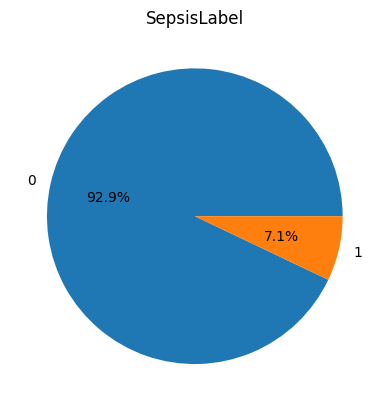

In [ ]:
plt.pie(Counter(labels).values(), labels=['0','1'], autopct='%1.1f%%')
plt.title('SepsisLabel')
plt.show()

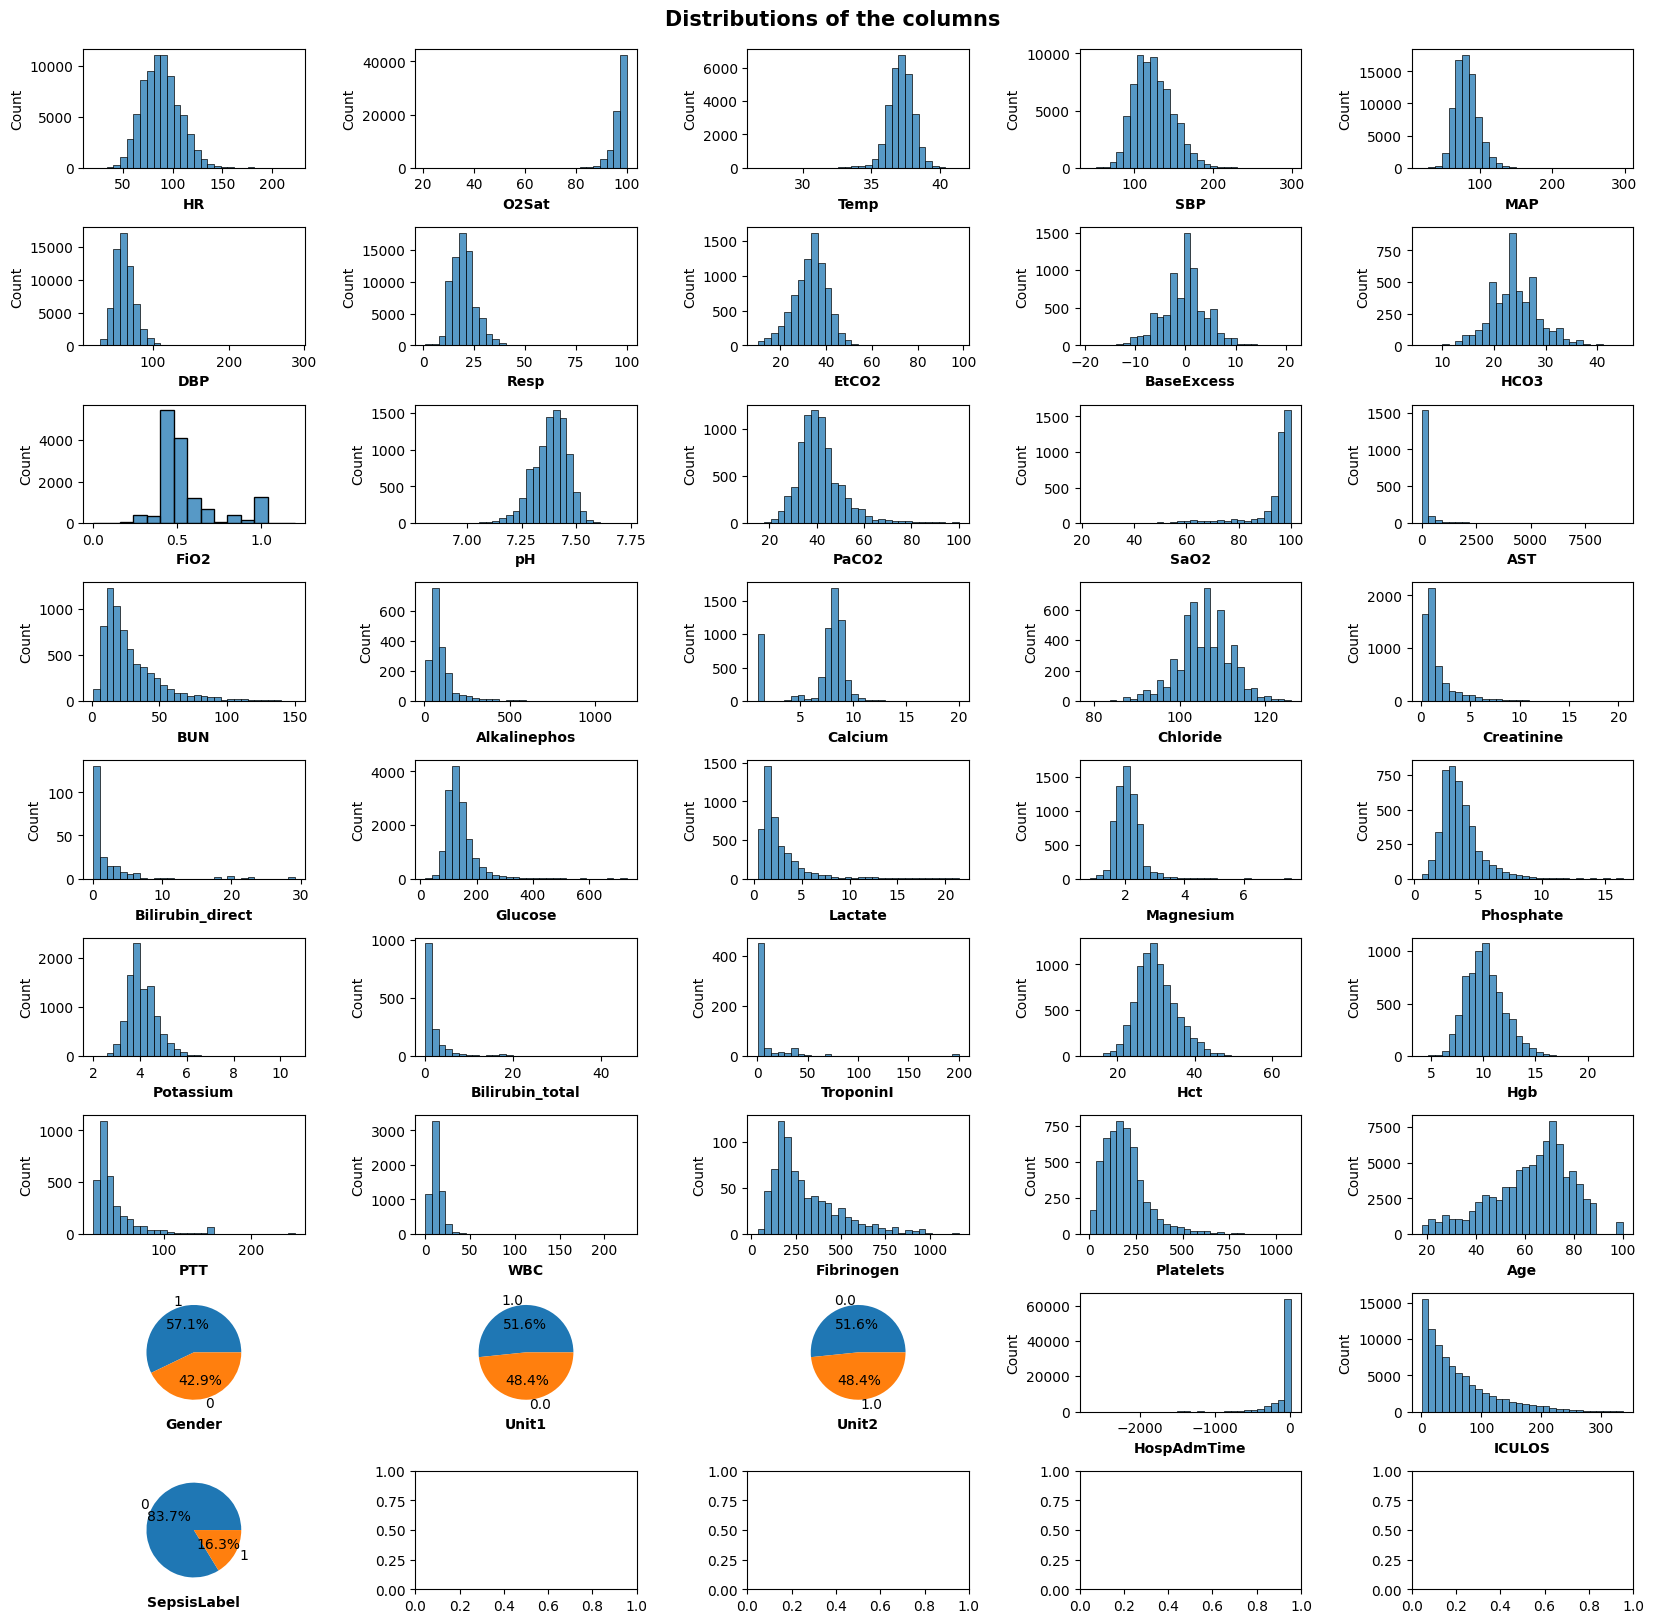

In [ ]:
columns = sick_df.columns.tolist()

fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(20, 20))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle("Distributions of the columns", fontsize=15, fontweight="bold", y=0.9)

i = 0
for col in sick_df.columns:
    if col != "Age" or col != "Gender":
        if sick_df[col].nunique() == 2:
            counts = sick_df[col].value_counts()
            if counts[1]/(counts[0]+counts[1]) > 0.95 or counts[1]/(counts[0]+counts[1]) < 0.05:
                axes[i//5, i%5].pie(counts, labels=counts.index, autopct='%1.1f%%', explode=(0, 0.8))
            else:
                axes[i//5, i%5].pie(counts, labels=counts.index, autopct='%1.1f%%')
        else:
            if col == "FiO2":
                curr_df = sick_df[~sick_df[col].isin([4000, -50, 7, 2])]
                sns.histplot(curr_df[col], ax=axes[i//5, i%5], bins=15)
            else:
                sns.histplot(sick_df[col], ax=axes[i//5, i%5], bins=30)
                
        axes[i//5, i%5].set_xlabel(col, fontweight="bold")
        axes[i//5, i%5].grid(False)
        i += 1

plt.show()

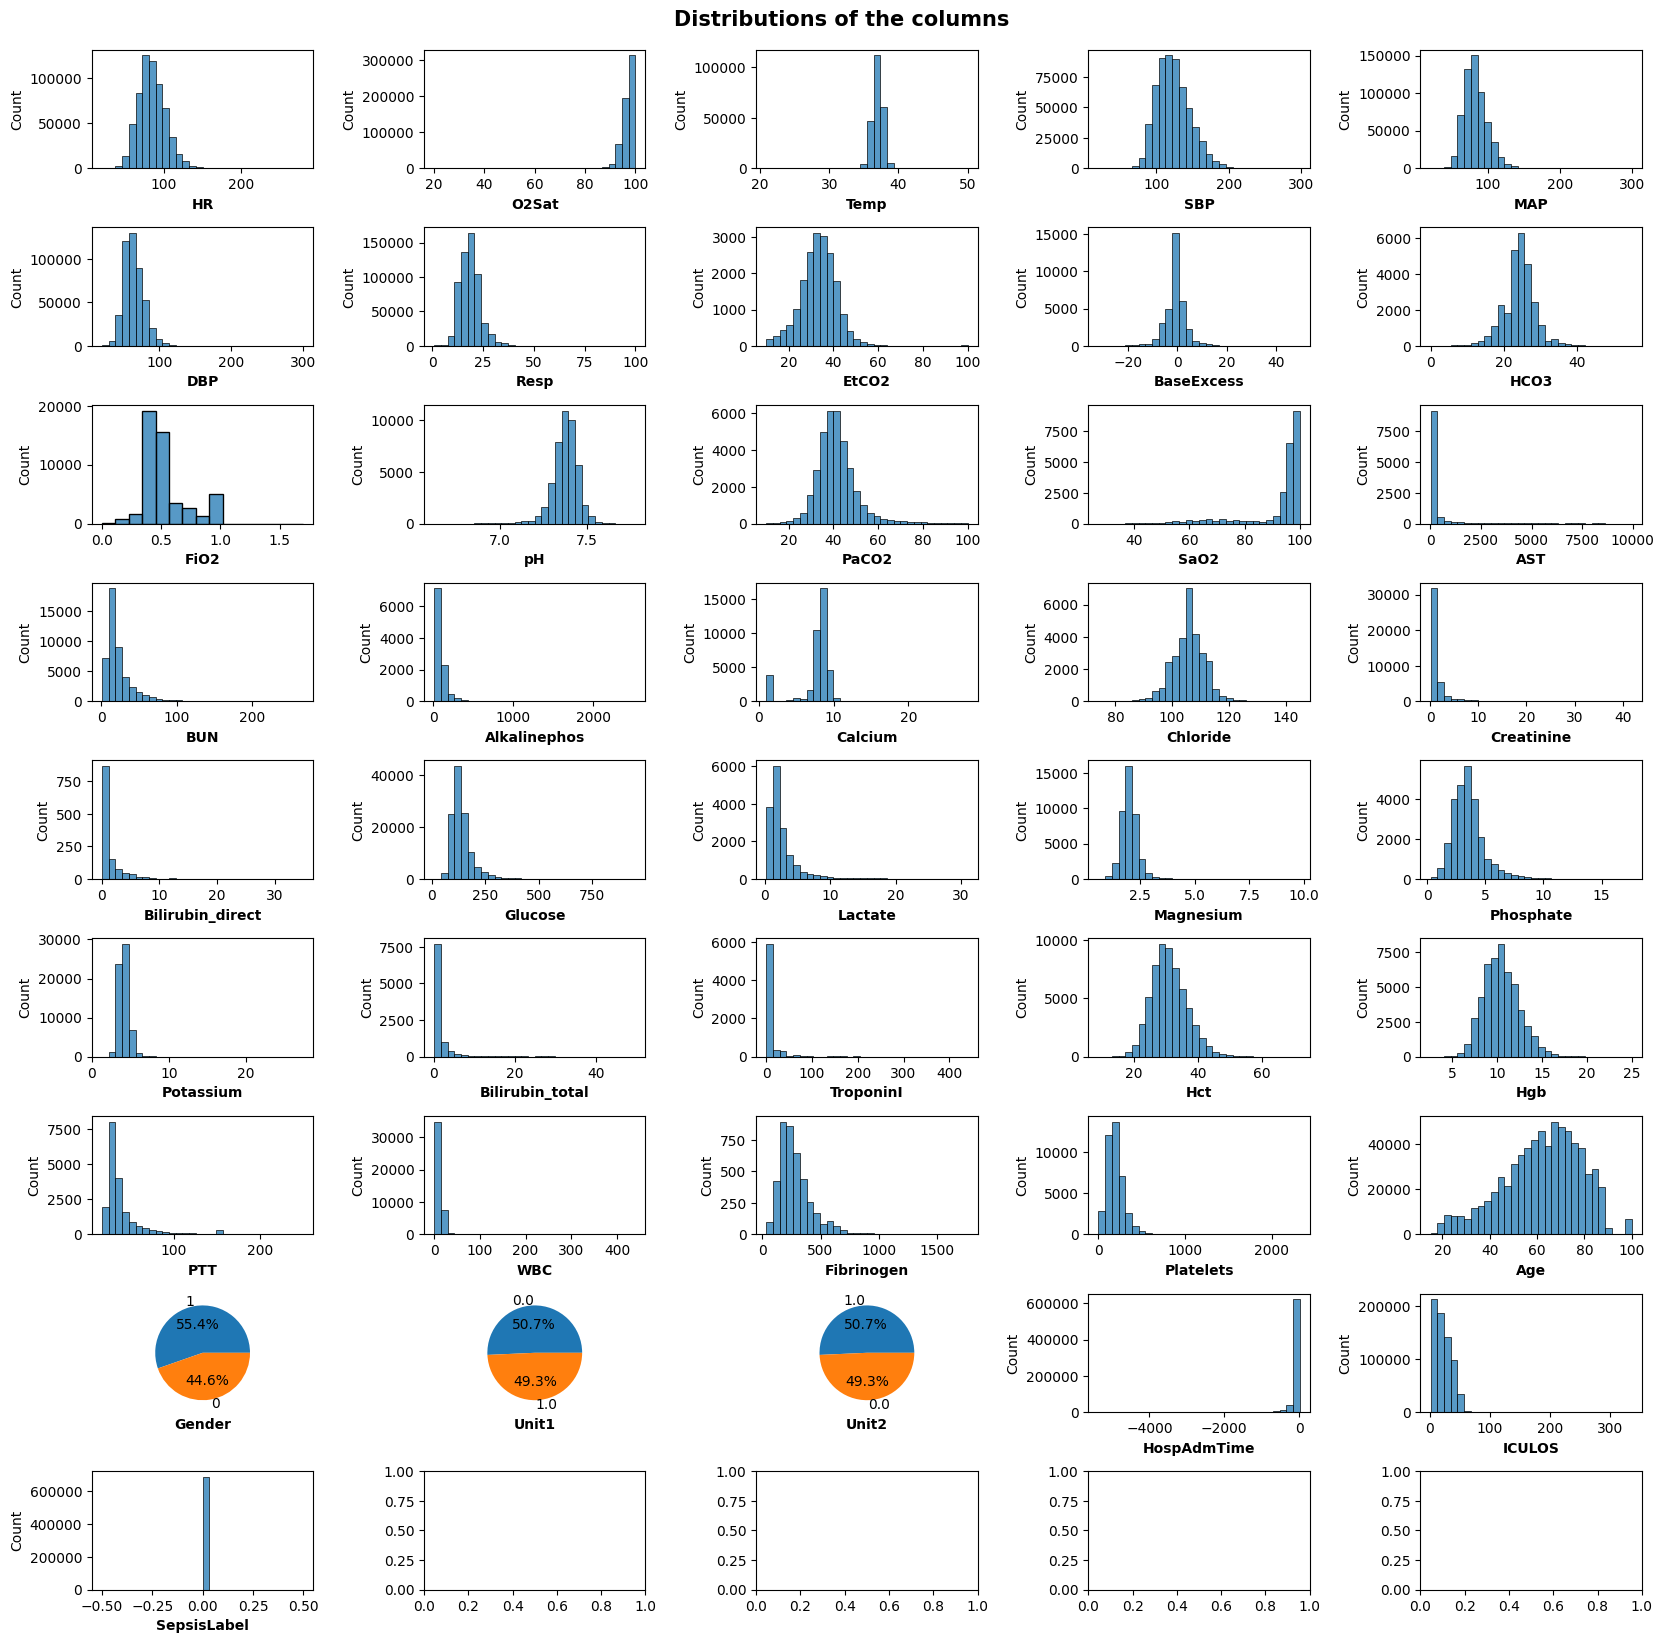

In [ ]:
columns = no_sick_df.columns.tolist()

fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(20, 20))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle("Distributions of the columns", fontsize=15, fontweight="bold", y=0.9)

i = 0
for col in no_sick_df.columns:
    if col != "Age" or col != "Gender":
        if no_sick_df[col].nunique() == 2:
            counts = no_sick_df[col].value_counts()
            if counts[1]/(counts[0]+counts[1]) > 0.95 or counts[1]/(counts[0]+counts[1]) < 0.05:
                axes[i//5, i%5].pie(counts, labels=counts.index, autopct='%1.1f%%', explode=(0, 0.8))
            else:
                axes[i//5, i%5].pie(counts, labels=counts.index, autopct='%1.1f%%')
        else:
            if col == "FiO2":
                curr_df = no_sick_df[~no_sick_df[col].isin([4000, -50, 7, 2])]
                sns.histplot(curr_df[col], ax=axes[i//5, i%5], bins=15)
            else:
                sns.histplot(no_sick_df[col], ax=axes[i//5, i%5], bins=30)
                
        axes[i//5, i%5].set_xlabel(col, fontweight="bold")
        axes[i//5, i%5].grid(False)
        i += 1

plt.show()

#algorthims 

#LSTM

In [3]:
from torch.utils.data import Dataset, DataLoader
import numpy as np
class PSVDataset(Dataset):
    def __init__(self, path):
        self.file_names = []
        # Iterate over all files in the directory and add their names to the list
        for file in os.listdir(path):
            if os.path.isfile(os.path.join(path, file)):
                self.file_names.append(file)
        # print(len(self.file_names))
        self.max_len = max(iculos) + 1
    def __len__(self):
        return len(self.file_names)
    
    def __getitem__(self, idx):
        df = pd.read_csv(f'data/train/{self.file_names[idx]}', sep='|')
        df.fillna(0, inplace=True)
        if df['SepsisLabel'].sum() > 0:
          index = df.index[df['SepsisLabel'] == 1].tolist()[0]
          df = df.loc[:index][df['SepsisLabel'] == 0]
          label = 1
        else:
          label = 0
        df = df.drop('SepsisLabel', axis=1)
        input_data = df.values
        padded_seq = np.zeros((self.max_len, len(input_data[0])))
        padded_seq[:len(input_data), :] = input_data
        padded_seq = torch.tensor(padded_seq, dtype=torch.float32)
        return padded_seq, label


In [4]:
class PSVDataset2(Dataset):
    def __init__(self, path):
        self.patients = []
        self.labels = []
        for filename in os.listdir(path):
            if filename.endswith('.psv'):
                # Load the file into a DataFrame
                file_path = os.path.join(path, filename)
                df = pd.read_csv(file_path, sep='|')
                df = df.fillna(0)
                if df['SepsisLabel'].sum() > 0:
                  self.labels.append(1)
                  index = df.index[df['SepsisLabel'] == 1].tolist()[0]
                  df = df.loc[:index][df['SepsisLabel'] == 0]
                else:
                  self.labels.append(0)
                df.drop('SepsisLabel', axis=1, inplace=True)
                vector = df.values
                # vector.extend([0] * (max_rows - df.shape[0]))
                self.patients.append(vector)
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        pat = torch.tensor(self.patients[idx], dtype=torch.float32).unsqueeze(0)
        lab = torch.tensor(self.labels[idx], dtype=torch.float32)
        return pat[0], lab
        

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, output_size)
        
    def forward(self, input):
        output, (hidden, cell) = self.lstm(input)
        output = self.linear(output[-1])
        return output


In [63]:
def train(model, train_dataset, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        running_loss = 0.0
        try:
          for i, (inputs, label) in enumerate(train_dataset):
                print(inputs.size(), label)
                optimizer.zero_grad()
                outputs = model(inputs)
                print(outputs, label)
                loss = criterion(outputs[0], label)
                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
                optimizer.step()
                running_loss += loss.item()
        except:
          print('train_dataset.patients[i]')
        print('Epoch [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, running_loss))

In [ ]:
import pandas as pd
# Define hyperparameters
input_size = 40
hidden_size = 200
output_size = 1
lr = 0.001
num_epochs = 10

model = LSTM(input_size, hidden_size, output_size)
model.train()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)


# Create data loader
train_dataset = PSVDataset2('data/train')
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1)

# Train the model
train(model, train_dataset, criterion, optimizer, num_epochs)

In [ ]:
from sklearn.metrics import f1_score

model.eval()
test_dataset = PSVDataset2('data/test')
y_true = []
y_pred = []
for i, (inputs, label) in enumerate(test_dataset):
    try:
      outputs = model(inputs)
    except:
      outputs = [0]
    y_pred.append(outputs)
    y_true.append(label)
y_pred = [int(tensor[0] > 0.5) for tensor in y_pred]

In [66]:
f1_score(y_true, y_pred, average='binary')

0.049152542372881365

#Linear Neural Network

In [6]:
class PSVDataset3(Dataset):
    def __init__(self, path):
        self.patients = []
        self.labels = []
        self.filenames = []
        for i, filename in enumerate(os.listdir(path)):
            if filename.endswith('.psv'):
                # Load the file into a DataFrame
                self.filenames.append(filename)
                file_path = os.path.join(path, filename)
                df = pd.read_csv(file_path, sep='|')
                df = df.fillna(1)
                if df['SepsisLabel'].sum() > 0:
                  self.labels.append(1)
                  if df['SepsisLabel'][0] == 1:
                    df = pd.DataFrame(df.iloc[0]).T
                  else:
                    index = df.index[df['SepsisLabel'] == 1].tolist()[0]
                    df = df.loc[:index][df['SepsisLabel'] == 0]
                    df = df.tail(1)
                else:
                  self.labels.append(0)
                  df = df.tail(1)
                try:
                  df = df.drop('SepsisLabel', axis=1)
                except:
                  self.wrong_df = df
                  print(i)
                  break
                vector = df.values
                self.patients.append(vector)
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        pat = torch.tensor(self.patients[idx], dtype=torch.float32).unsqueeze(0)
        lab = torch.tensor(self.labels[idx], dtype=torch.float32)
        return pat[0], lab
        

In [7]:
class PSVDataset4(Dataset):
    def __init__(self, path):
        self.patients = []
        self.labels = []
        self.filenames = []
        for i, filename in enumerate(os.listdir(path)):
            if filename.endswith('.psv'):
                # Load the file into a DataFrame
                self.filenames.append(filename)
                file_path = os.path.join(path, filename)
                df = pd.read_csv(file_path, sep='|')
                df = df.fillna(1)
                if df['SepsisLabel'].sum() > 0:
                  self.labels.append(1)
                  if df['SepsisLabel'][0] == 1:
                    df = pd.DataFrame(df.iloc[0]).T
                  else:
                    index = df.index[df['SepsisLabel'] == 1].tolist()[0]
                    df = df.loc[:index][df['SepsisLabel'] == 0]
                    df = df.tail(1)
                else:
                  self.labels.append(0)
                  df = df.tail(1)
                df = df[['ICULOS', 'Temp', 'HR', 'WBC', 'Resp']]
                #feature engineering
                #data enrichment 
                count = 0
                if df['Temp'].tolist()[0] < 36 or df['Temp'].tolist()[0] > 38:
                  count +=1
                if df['HR'].tolist()[0] > 90:
                  count +=1
                if df['Resp'].tolist()[0] > 20:
                  count +=1
                if df['WBC'].tolist()[0] < 4 or df['WBC'].tolist()[0] > 12:
                  count +=1
                vector = df.values
                np.append(vector, count)
                self.patients.append(vector)
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        pat = torch.tensor(self.patients[idx], dtype=torch.float32).unsqueeze(0)
        lab = torch.tensor(self.labels[idx], dtype=torch.float32)
        return pat[0], lab

In [41]:
class LinearNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(LinearNN, self).__init__()
        self.hidden_size = hidden_size1
        self.relu = nn.ReLU()
        self.linear1 = nn.Linear(input_size, hidden_size1)
        self.linear2 = nn.Linear(hidden_size1, hidden_size2)
        self.linear3 = nn.Linear(hidden_size2, output_size)
        
    def forward(self, input):
        output = self.linear1(input)
        output = self.relu(output)
        output = self.linear2(output)
        output = self.relu(output)
        output = self.linear3(output)
        output = nn.Sigmoid()(output)
        return output


In [ ]:
import os
# Define hyperparameters
input_size = 40
hidden_size1 = 200
hidden_size2 = 100
output_size = 1
lr = 0.001
num_epochs = 20

# Create data loader
train_dataset = PSVDataset3('data/train')
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1)


In [42]:

hidden_size1 = 200
hidden_size2 = 100
model = LinearNN(input_size, hidden_size1, hidden_size2, output_size)
model.train()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
for epoch in range(10):
        running_loss = 0.0
        for i, (inputs, label) in enumerate(train_dataset):
              optimizer.zero_grad()
              outputs = model(inputs[0])
              loss = criterion(outputs[0], label)
              loss.backward()
              # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
              optimizer.step()
              running_loss += loss.item()
        if running_loss < 3500:
          break
        print('Epoch [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, running_loss))

Epoch [1/20], Loss: 5160.7131
Epoch [2/20], Loss: 3873.9109
Epoch [3/20], Loss: 3895.1518
Epoch [4/20], Loss: 3755.2661
Epoch [5/20], Loss: 3668.8247
Epoch [6/20], Loss: 4135.0341
Epoch [7/20], Loss: 3519.6972
Epoch [8/20], Loss: 3622.2670
Epoch [9/20], Loss: 3694.8270
Epoch [10/20], Loss: 4087.8066


In [11]:
test_dataset = PSVDataset3('data/test')

<ipython-input-6-431a1f85342f>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.loc[:index][df['SepsisLabel'] == 0]
<ipython-input-6-431a1f85342f>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.loc[:index][df['SepsisLabel'] == 0]
<ipython-input-6-431a1f85342f>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.loc[:index][df['SepsisLabel'] == 0]
<ipython-input-6-431a1f85342f>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.loc[:index][df['SepsisLabel'] == 0]
<ipython-input-6-431a1f85342f>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.loc[:index][df['SepsisLabel'] == 0]
<ipython-input-6-431a1f85342f>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.loc[:index][df['SepsisLabel'] == 0]
<ipython-input-6-431a1f85342f>:19: UserWarning: Boolean Se

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

model.eval()
y_true = []
y_pred = []
for i, (inputs, label) in enumerate(test_dataset):
    try:
      outputs = model(inputs)
    except:
      outputs = [0]
    y_pred.append(outputs)
    y_true.append(label)
y_pred = [int(tensor[0] > 0.5) for tensor in y_pred]

In [ ]:
print(f"f1 : {f1_score(y_true, y_pred, average='binary')}")
print(f"precision : {precision_score(y_true, y_pred)}")
print(f"recall : {recall_score(y_true, y_pred)}")
print(f"accuracy_score : {accuracy_score(y_true, y_pred)}")

f1 : 0.524904214559387
precision : 0.9042904290429042
recall : 0.3697705802968961
accuracy_score : 0.9504


In [ ]:
# Define hyperparameters
input_size = 5
hidden_size1 = 200
hidden_size2 = 100
output_size = 1
lr = 0.001
num_epochs = 20

# Create data loader
train_dataset = PSVDataset4('data/train')
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1)
model = LinearNN(input_size, hidden_size1, hidden_size2, output_size)
model.train()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

for epoch in range(10):
        running_loss = 0.0
        for i, (inputs, label) in enumerate(train_dataset):
              optimizer.zero_grad()
              outputs = model(inputs[0])
              loss = criterion(outputs[0], label)
              loss.backward()
              # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
              optimizer.step()
              running_loss += loss.item()
        if running_loss < 3000:
          break
        print('Epoch [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, running_loss))

test_dataset = PSVDataset4('data/test')



In [ ]:
model.eval()
y_true = []
y_pred = []
for i, (inputs, label) in enumerate(test_dataset):
    try:
      outputs = model(inputs)
    except:
      outputs = [0]
    y_pred.append(outputs)
    y_true.append(label)
y_pred = [int(tensor[0] > 0.5) for tensor in y_pred]
print(f"f1 : {f1_score(y_true, y_pred, average='binary')}")
print(f"precision : {precision_score(y_true, y_pred)}")
print(f"recall : {recall_score(y_true, y_pred)}")
print(f"accuracy : {accuracy_score(y_true, y_pred)}")

f1 : 0.5313653136531366
precision : 0.8396501457725948
recall : 0.38866396761133604
accuracy : 0.9492


###Post analysis

In [48]:
model = LinearNN(input_size, hidden_size1, hidden_size2, output_size)
model.train()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [49]:
#Female
gender_index = list(df.columns).index('Gender')
# train_dataset[train_dataset[0][0][gender_index]==1]
for epoch in range(10):
        running_loss = 0.0
        for i, (inputs, label) in enumerate(train_dataset):
              optimizer.zero_grad()
              if inputs[0][gender_index]==1:
                continue
              outputs = model(inputs[0])
              loss = criterion(outputs[0], label)
              loss.backward()
              # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
              optimizer.step()
              running_loss += loss.item()
        print('Epoch [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, running_loss))

Epoch [1/20], Loss: 2633.0438
Epoch [2/20], Loss: 1881.4869
Epoch [3/20], Loss: 1711.3264
Epoch [4/20], Loss: 1830.5661
Epoch [5/20], Loss: 1655.4329
Epoch [6/20], Loss: 1439.9562
Epoch [7/20], Loss: 1379.4408
Epoch [8/20], Loss: 1443.0658
Epoch [9/20], Loss: 1379.5059
Epoch [10/20], Loss: 1323.5589


In [51]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
model.eval()
y_true = []
y_pred = []
for i, (inputs, label) in enumerate(test_dataset):
    try:
      outputs = model(inputs)
    except:
      outputs = [0]
    y_pred.append(outputs)
    y_true.append(label)
y_pred = [int(tensor[0] > 0.5) for tensor in y_pred]
print(f"f1 : {f1_score(y_true, y_pred, average='binary')}")
print(f"precision : {precision_score(y_true, y_pred)}")
print(f"recall : {recall_score(y_true, y_pred)}")
print(f"accuracy : {accuracy_score(y_true, y_pred)}")

f1 : 0.6503340757238307
precision : 0.7227722772277227
recall : 0.5910931174089069
accuracy : 0.9529


In [52]:
model = LinearNN(input_size, hidden_size1, hidden_size2, output_size)
model.train()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
#male
gender_index = list(df.columns).index('Gender')
# train_dataset[train_dataset[0][0][gender_index]==1]
for epoch in range(10):
        running_loss = 0.0
        for i, (inputs, label) in enumerate(train_dataset):
              optimizer.zero_grad()
              if inputs[0][gender_index]==0:
                continue
              outputs = model(inputs[0])
              loss = criterion(outputs[0], label)
              loss.backward()
              # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
              optimizer.step()
              running_loss += loss.item()
        print('Epoch [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, running_loss))
model.eval()
y_true = []
y_pred = []
for i, (inputs, label) in enumerate(test_dataset):
    try:
      outputs = model(inputs)
    except:
      outputs = [0]
    y_pred.append(outputs)
    y_true.append(label)
y_pred = [int(tensor[0] > 0.5) for tensor in y_pred]
print(f"f1 : {f1_score(y_true, y_pred, average='binary')}")
print(f"precision : {precision_score(y_true, y_pred)}")
print(f"recall : {recall_score(y_true, y_pred)}")
print(f"accuracy : {accuracy_score(y_true, y_pred)}")

Epoch [1/20], Loss: 3599.3022
Epoch [2/20], Loss: 2467.1771
Epoch [3/20], Loss: 2351.3924
Epoch [4/20], Loss: 2217.2058
Epoch [5/20], Loss: 2132.9739
Epoch [6/20], Loss: 2112.1999
Epoch [7/20], Loss: 2254.5508
Epoch [8/20], Loss: 2037.4421
Epoch [9/20], Loss: 2434.6342
Epoch [10/20], Loss: 2044.2520
f1 : 0.5565862708719852
precision : 0.8902077151335311
recall : 0.4048582995951417
accuracy : 0.9522


#data processing for random forest and xgboost

In [8]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [ ]:
#make big df

# specify path to folder containing psv files
folder_path = 'data/train'

# load all psv files into a list of dataframes
#dataframes = [psv_to_df(os.path.join(folder_path, file)) for file in os.listdir(folder_path)]

big_df = pd.DataFrame()

for file in os.listdir(folder_path):
   # load psv file into a Pandas dataframe
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, delimiter='|')
    index_list = df.index[df['SepsisLabel'] == 1].tolist()
    if index_list:
      index = index_list[0]
      df = df.iloc[0:index + 1]
    patient_id = os.path.basename(file_path).split('.')[0].split("_")[1] # example assuming filename is patient_id.psv
    
    # add patient_ID column to dataframe
    df['patient_ID'] = patient_id
    big_df = pd.concat([big_df, df])

In [75]:
# specify path to folder containing psv files
folder_path = 'data/test'

big_test_df = pd.DataFrame()

for file in os.listdir(folder_path):
   # load psv file into a Pandas dataframe
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, delimiter='|')
    index_list = df.index[df['SepsisLabel'] == 1].tolist()
    if index_list:
      index = index_list[0]
      df = df.iloc[0:index + 1] 
    patient_id = os.path.basename(file_path).split('.')[0].split("_")[1]  # example assuming filename is patient_id.psv
    
    # add patient_ID column to dataframe
    df['patient_ID'] = patient_id
    big_test_df = pd.concat([big_test_df, df])

<ipython-input-75-4be6fdfa8f61>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['patient_ID'] = patient_id
<ipython-input-75-4be6fdfa8f61>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['patient_ID'] = patient_id


In [77]:
train = big_df.copy()
test = big_test_df.copy()

In [78]:
#fill data
grouped_by_patient = train.groupby('patient_ID')
train = grouped_by_patient.apply(lambda x: x.interpolate(limit_direction = 'both').bfill().ffill()) 

#fill data
grouped_by_patient = test.groupby('patient_ID')
test = grouped_by_patient.apply(lambda x: x.interpolate(limit_direction = 'both').bfill().ffill()) 

<ipython-input-78-28add42ddd59>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train = grouped_by_patient.apply(lambda x: x.interpolate(limit_direction = 'both').bfill().ffill())
<ipython-input-78-28add42ddd59>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test = grouped_by_patient.apply(la

In [79]:
cat_cols = ['Unit1', 'Unit2']
for col in train.columns:
  if col not in cat_cols:
      train[col] = train[col].fillna(train[col].mean())
for col in test.columns:
  if col not in cat_cols:
      test[col] = test[col].fillna(test[col].mean())
train[cat_cols] = train[cat_cols].fillna(0)
test[cat_cols] = test[cat_cols].fillna(0)

In [80]:
percent_missing = train.isna().mean() * 100
print(percent_missing.sort_values(ascending=False))

HR                  0.0
WBC                 0.0
Magnesium           0.0
Phosphate           0.0
Potassium           0.0
Bilirubin_total     0.0
TroponinI           0.0
Hct                 0.0
Hgb                 0.0
PTT                 0.0
Fibrinogen          0.0
O2Sat               0.0
Platelets           0.0
Age                 0.0
Gender              0.0
Unit1               0.0
Unit2               0.0
HospAdmTime         0.0
ICULOS              0.0
SepsisLabel         0.0
Lactate             0.0
Glucose             0.0
Bilirubin_direct    0.0
Creatinine          0.0
Temp                0.0
SBP                 0.0
MAP                 0.0
DBP                 0.0
Resp                0.0
EtCO2               0.0
BaseExcess          0.0
HCO3                0.0
FiO2                0.0
pH                  0.0
PaCO2               0.0
SaO2                0.0
AST                 0.0
BUN                 0.0
Alkalinephos        0.0
Calcium             0.0
Chloride            0.0
patient_ID      

In [81]:
percent_missing = test.isna().mean() * 100
print(percent_missing.sort_values(ascending=False))

HR                  0.0
WBC                 0.0
Magnesium           0.0
Phosphate           0.0
Potassium           0.0
Bilirubin_total     0.0
TroponinI           0.0
Hct                 0.0
Hgb                 0.0
PTT                 0.0
Fibrinogen          0.0
O2Sat               0.0
Platelets           0.0
Age                 0.0
Gender              0.0
Unit1               0.0
Unit2               0.0
HospAdmTime         0.0
ICULOS              0.0
SepsisLabel         0.0
Lactate             0.0
Glucose             0.0
Bilirubin_direct    0.0
Creatinine          0.0
Temp                0.0
SBP                 0.0
MAP                 0.0
DBP                 0.0
Resp                0.0
EtCO2               0.0
BaseExcess          0.0
HCO3                0.0
FiO2                0.0
pH                  0.0
PaCO2               0.0
SaO2                0.0
AST                 0.0
BUN                 0.0
Alkalinephos        0.0
Calcium             0.0
Chloride            0.0
patient_ID      

In [82]:
g = train.groupby('patient_ID')
last_rows = (pd.concat([g.tail(1)]).reset_index(drop=True))
g = test.groupby('patient_ID')
last_rows_test = (pd.concat([g.tail(1)]).reset_index(drop=True))

#Random forest

In [83]:
y_train = last_rows["SepsisLabel"]
X_train = last_rows.drop(columns=['SepsisLabel'])
y_test = last_rows_test["SepsisLabel"]
X_test = last_rows_test.drop(columns=['SepsisLabel'])

In [84]:
model_3 = RandomForestClassifier(n_estimators=300,max_depth = 40,min_samples_leaf = 3, random_state= 2)
model_3.fit(X_train, y_train)
rcf_predictions_3 = model_3.predict(X_test)
print(f1_score(rcf_predictions_3, y_test))

0.6616033755274261


<Axes: >

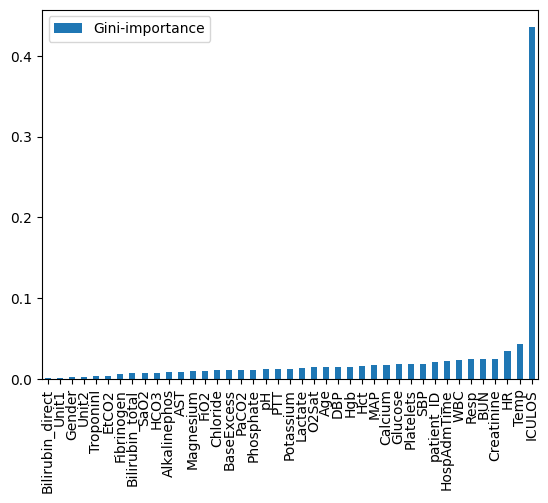

In [85]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, model_3.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)

In [86]:
last_rows['SIRS'] = 0
last_rows_test['SIRS'] = 0

Here we tried adding the SIRS feature

In [87]:
for id in last_rows['patient_ID'].unique():
  row_index = last_rows.loc[last_rows['patient_ID'] == id].index[0]
  count = 0
  if last_rows.at[row_index, 'Temp'] < 36 or last_rows.at[row_index, 'Temp'] > 38:
    count +=1
  if last_rows.at[row_index, 'HR'] >  90:
    count +=1
  if last_rows.at[row_index, 'Resp'] > 20:
    count +=1
  if last_rows.at[row_index, 'WBC'] < 4 or last_rows.at[row_index, 'WBC'] > 12:
    count +=1
  last_rows.at[row_index , 'SIRS'] = count

In [88]:
for id in last_rows_test['patient_ID'].unique():
  row_index = last_rows_test.loc[last_rows_test['patient_ID'] == id].index[0]
  count = 0
  if last_rows_test.at[row_index, 'Temp'] < 36 or last_rows_test.at[row_index, 'Temp'] > 38:
    count +=1
  if last_rows_test.at[row_index, 'HR'] >  90:
    count +=1
  if last_rows_test.at[row_index, 'Resp'] > 20:
    count +=1
  if last_rows_test.at[row_index, 'WBC'] < 4 or last_rows_test.at[row_index, 'WBC'] > 12:
    count +=1
  last_rows_test.at[row_index , 'SIRS'] = count

In [89]:
medical_signs = ['ICULOS', 'Temp', 'HR', 'WBC', 'Resp', 'SIRS']
y_train = last_rows["SepsisLabel"]
X_train = last_rows[medical_signs]
y_test = last_rows_test["SepsisLabel"]
X_test = last_rows_test[medical_signs]

In [90]:
model = RandomForestClassifier(n_estimators=300,max_depth = 40,min_samples_leaf = 3, random_state= 2)
model.fit(X_train, y_train)
rcf_predictions = model.predict(X_test)
print(f1_score(rcf_predictions, y_test))

0.6704453441295547


<Axes: >

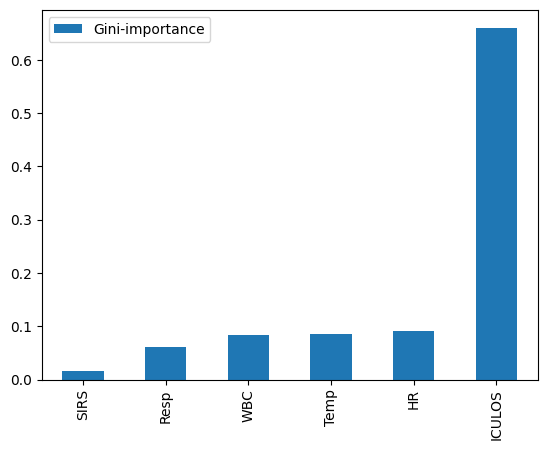

In [91]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)

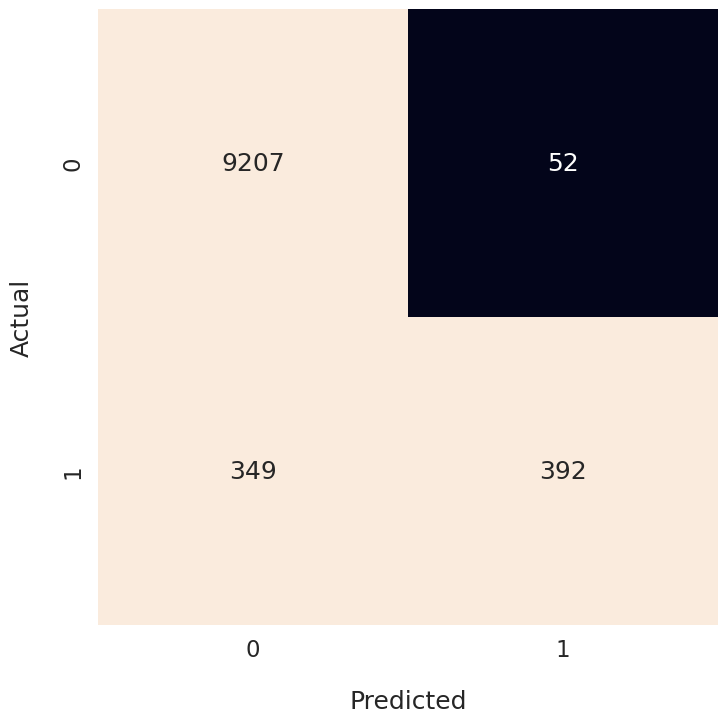

Accuracy = 0.9599
Precision = 0.8828828828828829
Recall = 0.5290148448043185
F1 Score = 0.6616033755274261


In [92]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

conf_matrix = confusion_matrix(y_test, rcf_predictions_3)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    #cmap='', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()


accuracy = accuracy_score(y_test, rcf_predictions_3)
print(f"Accuracy = {accuracy}")

precision = precision_score(y_test, rcf_predictions_3)
recall = recall_score(y_test, rcf_predictions_3)
f1score = f1_score(y_test, rcf_predictions_3)

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

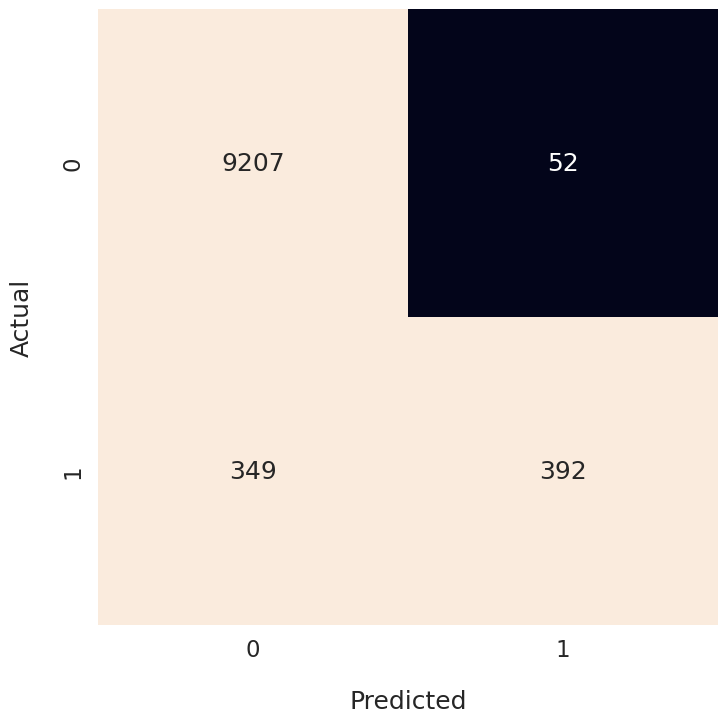

Accuracy = 0.9593
Precision = 0.8380566801619433
Recall = 0.5587044534412956
F1 Score = 0.6704453441295547


In [93]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

conf_matrix = confusion_matrix(y_test, rcf_predictions_3)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    #cmap='', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()


accuracy = accuracy_score(y_test, rcf_predictions)
print(f"Accuracy = {accuracy}")

precision = precision_score(y_test, rcf_predictions)
recall = recall_score(y_test, rcf_predictions)
f1score = f1_score(y_test, rcf_predictions)

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

#XGB


In [94]:
medical_signs = ['ICULOS', 'Temp', 'HR', 'WBC', 'Resp', 'SIRS']
y_train = last_rows["SepsisLabel"]
X_train = last_rows[medical_signs]
y_test = last_rows_test["SepsisLabel"]
X_test = last_rows_test[medical_signs]

In [95]:
import xgboost
sc = 0.1 + ((len(y_train.values) - sum(y_train.values))/sum(y_train.values))
model = xgboost.XGBClassifier(max_depth=60, min_child_weight=10, subsample=0.8, colsample_bytree=0.8,  scale_pos_weight=sc, learning_rate=0.1, n_estimators=1200, eval_metric='auc', objective='binary:logistic')
model.fit(X_train.values, y_train.values)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=60, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              n_estimators=1200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [96]:
rcf_predictions = model.predict(X_test.values)
print(f1_score(rcf_predictions, y_test.values))

0.6397694524495677


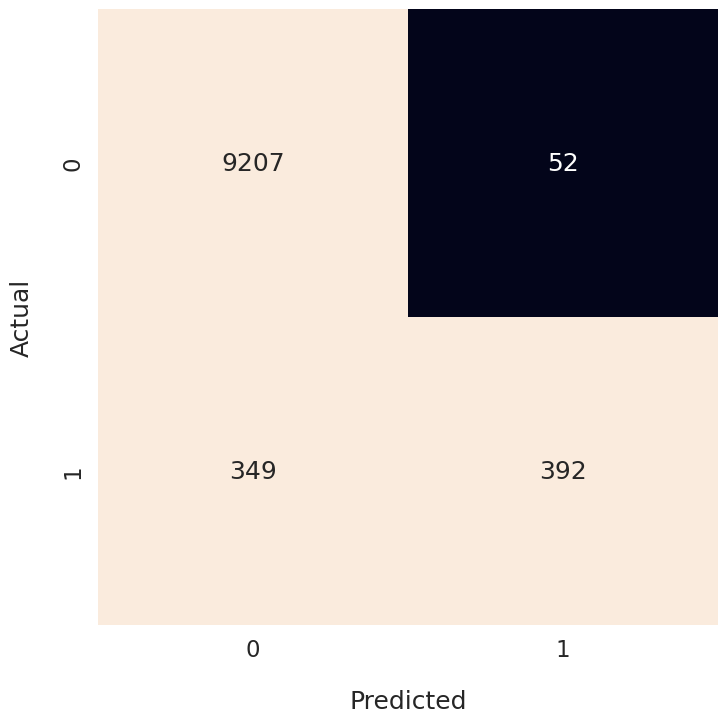

Accuracy = 0.95
Precision = 0.6862442040185471
Recall = 0.5991902834008097
F1 Score = 0.6397694524495677


In [97]:
conf_matrix = confusion_matrix(y_test, rcf_predictions_3)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    #cmap='', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()


accuracy = accuracy_score(y_test, rcf_predictions)
print(f"Accuracy = {accuracy}")

precision = precision_score(y_test, rcf_predictions)
recall = recall_score(y_test, rcf_predictions)
f1score = f1_score(y_test, rcf_predictions)

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

In [98]:
y_train = last_rows["SepsisLabel"]
X_train = last_rows.drop(columns=['SepsisLabel', 'SIRS'])
y_test = last_rows_test["SepsisLabel"]
X_test = last_rows_test.drop(columns=['SepsisLabel', 'SIRS'])

In [99]:
import xgboost
sc = 0.1 + ((len(y_train.values) - sum(y_train.values))/sum(y_train.values))
model = xgboost.XGBClassifier(max_depth=60, min_child_weight=10, subsample=0.8, colsample_bytree=0.8,  scale_pos_weight=sc, learning_rate=0.1, n_estimators=1200, eval_metric='auc', objective='binary:logistic')
model.fit(X_train.values, y_train.values)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=60, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              n_estimators=1200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [100]:
rcf_predictions = model.predict(X_test.values)
print(f1_score(rcf_predictions, y_test.values))

0.7131445170660857


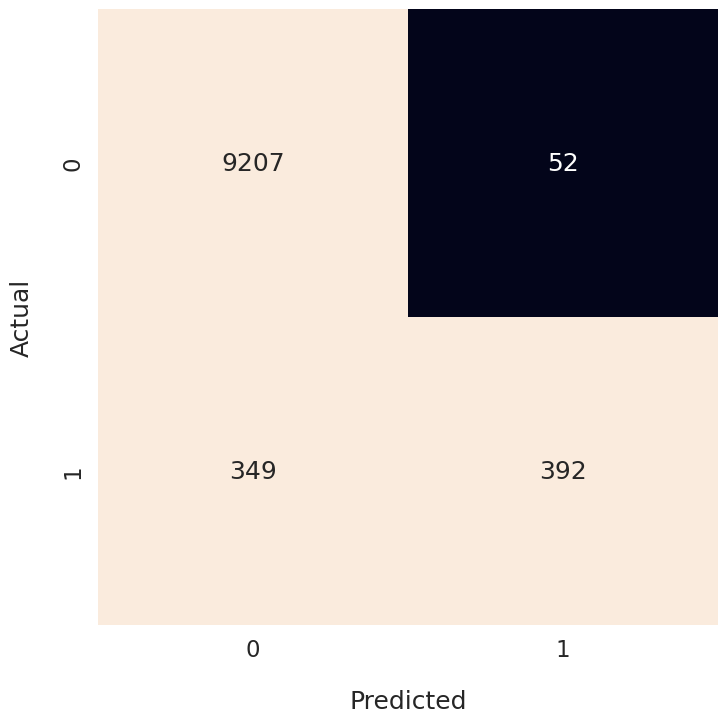

Accuracy = 0.9605
Precision = 0.7720125786163522
Recall = 0.6626180836707153
F1 Score = 0.7131445170660857


In [101]:
conf_matrix = confusion_matrix(y_test, rcf_predictions_3)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    #cmap='', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()


accuracy = accuracy_score(y_test, rcf_predictions)
print(f"Accuracy = {accuracy}")

precision = precision_score(y_test, rcf_predictions)
recall = recall_score(y_test, rcf_predictions)
f1score = f1_score(y_test, rcf_predictions)

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

run with fillna with constant

In [12]:
import xgboost
sc = 0.1 + ((len(train_dataset[:][1]) - sum(train_dataset[:][1]))/sum(train_dataset[:][1])).float().item()

<ipython-input-6-431a1f85342f>:36: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  pat = torch.tensor(self.patients[idx], dtype=torch.float32).unsqueeze(0)


In [13]:
model = xgboost.XGBClassifier(max_depth=60, min_child_weight=10, subsample=0.8, colsample_bytree=0.8, learning_rate=0.1, n_estimators=1200, scale_pos_weight=sc, eval_metric='auc', objective='binary:logistic')

In [14]:
model.fit(train_dataset[:][0].squeeze(dim=1), train_dataset[:][1])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=60, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              n_estimators=1200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [15]:
y_pred = model.predict(test_dataset[:][0].squeeze(dim=1))
y_true = test_dataset[:][1]

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='binary')

0.7385287691187181

###Post analysis

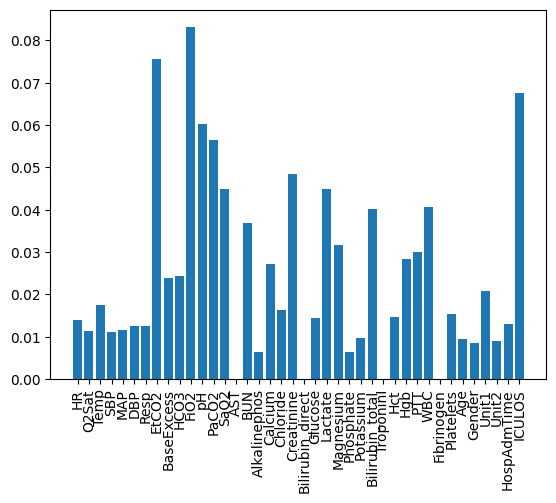

In [24]:
importance = model.feature_importances_
import matplotlib.pyplot as plt

plt.bar(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS'], importance)
plt.xticks(rotation=90)
plt.show()


In [ ]:
y_pred = model.predict(train_dataset[:][0].squeeze(dim=1))
y_true = train_dataset[:][1]
f1_score(y_true, y_pred, average='binary')

0.9996467679265277

In [ ]:
import pickle
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import pickle
with open('xgb_model.pkl', 'rb') as file:
    # Load the model from the file using pickle
    model = pickle.load(file)

In [ ]:
files_names = [name[:-4] for name in test_dataset.filenames]
df = pd.DataFrame({'id': files_names, 'prediction': y_pred})
df.to_csv('dataframe.csv', index=False)

#Mann Whitney test

In [102]:
import scipy
train_sick = train[train['SepsisLabel'] == 1]
train_not_sick = train[train['SepsisLabel'] == 0]
x = train_sick['Temp']
y = train_not_sick['Temp'] 
U, p = scipy.stats.mannwhitneyu(x, y) 
if p < 0.05:
  print("The Temp distrbutions are different")
x = train_sick['HR']
y = train_not_sick['HR'] 
U, p = scipy.stats.mannwhitneyu(x, y) 
if p < 0.05:
  print("The HR distrbutions are different")
x = train_sick['Resp']
y = train_not_sick['Resp'] 
U, p = scipy.stats.mannwhitneyu(x, y) 
if p < 0.1:
  print("The RESP distrbutions are different")
x = train_sick['WBC']
y = train_not_sick['WBC'] 
U, p = scipy.stats.mannwhitneyu(x, y) 
if p < 0.05:
  print("The WBC distrbutions are different")
x = train_sick['ICULOS']
y = train_not_sick['ICULOS'] 
U, p = scipy.stats.mannwhitneyu(x, y) 
if p < 0.05:
  print("The ICULOS distrbutions are different")

The Temp distrbutions are different
The HR distrbutions are different
The RESP distrbutions are different
The WBC distrbutions are different
The ICULOS distrbutions are different
